<a href="https://colab.research.google.com/github/arghads9177/cnn-image-classification-cifar-10/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification with CIFAR-10 Dataset**

## Project Overview  
This project involves building a robust image classification model using the **CIFAR-10 dataset**, a widely-used benchmark dataset for image recognition tasks. The dataset consists of small 32x32 color images belonging to 10 distinct classes. The goal is to develop a model capable of accurately classifying images into these categories.

---

## About the Dataset  

### Dataset Description  
The **CIFAR-10 dataset** consists of:  
- **60,000 images** in total.  
- Each image is **32x32 pixels** and colored (RGB).  
- **10 classes**, with **6,000 images per class**.  

### Dataset Splits  
- **Training Set:** 50,000 images.  
- **Test Set:** 10,000 images.  

### Data Organization  
- The training set is divided into **five batches**, each containing 10,000 images.  
- The test set contains **1,000 images per class**, selected randomly.  
- Training batches may have slight imbalances, but the dataset ensures exactly **5,000 images per class** in total.  

### Class Labels  
The 10 mutually exclusive classes in the dataset are:  
- **airplane**
- **automobile**
- **bird**
- **cat**
- **deer**
- **dog**
- **frog**
- **horse**
- **ship**
- **truck**  

#### Notes:  
- Classes are **mutually exclusive**, with no overlap between categories.  
- "Automobile" includes sedans, SUVs, etc., while "Truck" refers to large trucks (excluding pickup trucks).  

---

## Objectives  

1. **Image Classification:**  
   - Build a model to classify images into one of the 10 CIFAR-10 classes.  

2. **Model Evaluation:**  
   - Evaluate the model's performance using metrics like accuracy and confusion matrix.  

3. **Data Augmentation:**  
   - Enhance the dataset with techniques like flipping, cropping, and color adjustments to improve model robustness.  

4. **Optimization:**  
   - Experiment with different architectures and hyperparameters to achieve high accuracy.  

---

## Methodology  

### 1. **Data Understanding and Preprocessing**  
   - **Data Exploration:** Visualize sample images from each class.  
   - **Normalization:** Scale pixel values to [0, 1] for better model convergence.  
   - **Data Augmentation:** Apply techniques such as horizontal flipping, random cropping, and rotation.  

### 2. **Model Building**  
   - **Baseline Model:** Start with a simple Convolutional Neural Network (CNN) architecture.  
   - **Advanced Architectures:** Experiment with architectures like ResNet, VGG, and EfficientNet.  
   - **Transfer Learning:** Utilize pre-trained models for improved performance.  

### 3. **Training**  
   - Use **Cross-Entropy Loss** as the loss function.  
   - Optimize with **Adam** or **SGD** optimizers.  
   - Implement techniques like **learning rate scheduling** and **early stopping**.  

### 4. **Evaluation**  
   - **Metrics:** Use accuracy, precision, recall, and F1-score for performance evaluation.  
   - **Confusion Matrix:** Analyze misclassifications to identify challenging classes.  
   - **Visualization:** Plot loss and accuracy curves for training and validation.  

---

## Tools and Libraries  

- **Frameworks:** TensorFlow, PyTorch, Keras  
- **Visualization Tools:** Matplotlib, seaborn  
- **Data Handling:** NumPy, pandas  
- **Environment:** Jupyter Notebook, Google Colab  

---

## Applications  

1. **Real-World Classification:**  
   - Use the trained model for tasks like traffic object recognition or animal classification.  

2. **Educational Purposes:**  
   - Demonstrate the power of CNNs and advanced architectures for image classification.  

3. **Transfer Learning:**  
   - Fine-tune the model for custom datasets with similar characteristics.  

---

## Dataset Information  

- **Name:** CIFAR-10 Dataset  
- **Size:** ~163 MB  
- **Format:** Binary files (can be converted to CSV or other formats)  
- **Source:** [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)  

---

## Future Enhancements  

1. **Model Deployment:**  
   - Deploy the trained model using Flask, FastAPI, or TensorFlow Serving for real-time predictions.  

2. **Performance Improvements:**  
   - Experiment with ensemble learning or hybrid models to enhance accuracy.  

3. **Explainability:**  
   - Use techniques like Grad-CAM to understand model decisions.  

---

## Conclusion  

The CIFAR-10 dataset provides an excellent platform to explore and implement image classification techniques. By leveraging advanced deep learning architectures, this project aims to achieve high accuracy and generalizability, offering insights into the challenges and solutions in image recognition.

### Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings


### Settings

In [ ]:
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

### Load Dataset

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:

# Data insights
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


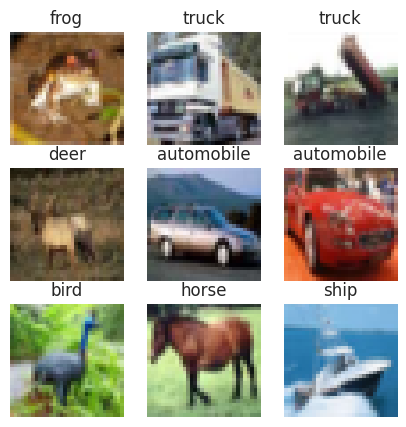

In [ ]:

# Display sample images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


### Preprocess the Images

In [ ]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


### Constructing the CNN Model

The key parameters for the model are,

- **Learning Rate:** 0.001
- **Optimizer:** Adam
- **Batch Size:**- ** 64
- **Activation Function:** ReLU
- **Loss Function:** Categorical Crossentropy

In [ ]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,690 (655.04 KB)

 Trainable params: 167,690 (655.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training and Validation

In [ ]:
# Train and validate the model
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3502 - loss: 1.7634 - val_accuracy: 0.5712 - val_loss: 1.2086
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5896 - loss: 1.1610 - val_accuracy: 0.6422 - val_loss: 1.0166
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6637 - loss: 0.9636 - val_accuracy: 0.6822 - val_loss: 0.9176
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7086 - loss: 0.8463 - val_accuracy: 0.6903 - val_loss: 0.9005
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7369 - loss: 0.7559 - val_accuracy: 0.7118 - val_loss: 0.8352
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7638 - loss: 0.6794 - val_accuracy: 0.7159 - val_loss: 0.8253
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7843 - loss: 0.6195 - val_accuracy: 0.7277 - val_loss: 0.8098
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8064 - loss: 0.5575 - val_accuracy: 0

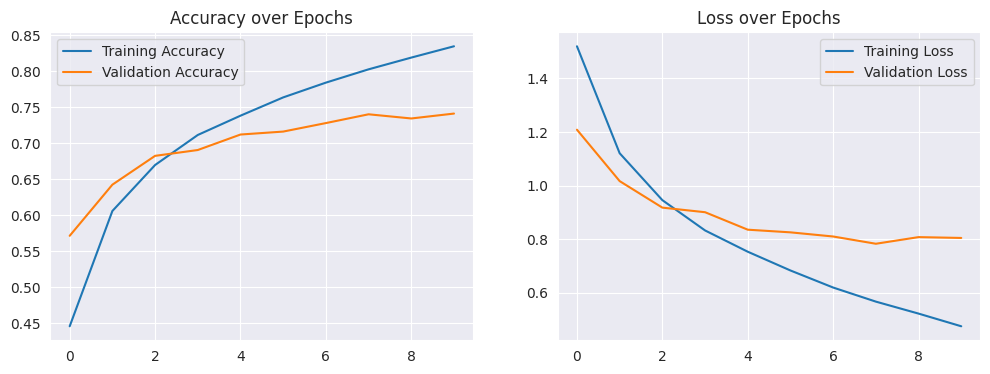

In [ ]:
# Visualize training and validation performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

### Result Analysis

In [ ]:
# Evaluate Test Scores
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7403 - loss: 0.7986
Test Loss: 0.8043695092201233
Test Accuracy: 0.7408999800682068


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


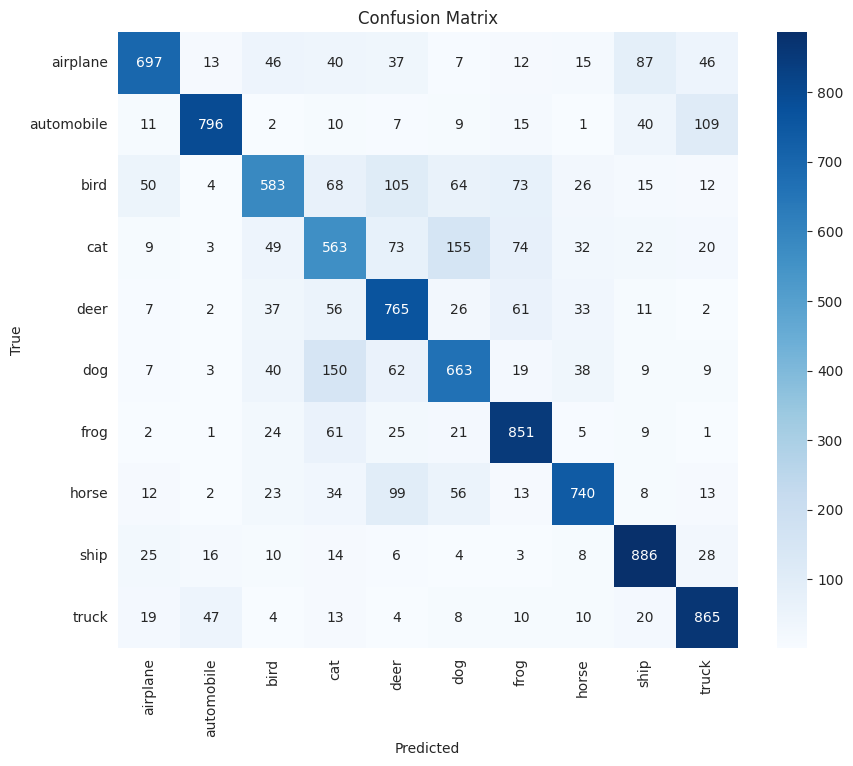

In [ ]:
# Generate confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.70      0.76      1000
  automobile       0.90      0.80      0.84      1000
        bird       0.71      0.58      0.64      1000
         cat       0.56      0.56      0.56      1000
        deer       0.65      0.77      0.70      1000
         dog       0.65      0.66      0.66      1000
        frog       0.75      0.85      0.80      1000
       horse       0.81      0.74      0.78      1000
        ship       0.80      0.89      0.84      1000
       truck       0.78      0.86      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



## **Analysis of the Classification Report**

### **Overall Performance**
- **Accuracy**: The model achieves an overall accuracy of **74%**, indicating an improvement compared to the previous version with 71%.
- **Macro Average**:
  - **Precision**: 0.75
  - **Recall**: 0.74
  - **F1-Score**: 0.74
  These metrics suggest a balanced performance across classes with moderate classification ability.
- **Weighted Average**: Similar to the macro average, highlighting that class representation in the dataset is uniform.

---

## **Class-Wise Performance Insights**
1. **Strongly Performing Classes**:
   - **Automobile**: High precision (**0.90**) and good recall (**0.80**), resulting in an F1-score of **0.84**. The model effectively identifies automobiles with minimal false positives.
   - **Frog**: Excellent recall (**0.85**) and strong precision (**0.75**) lead to an F1-score of **0.80**, showing that the model consistently identifies frogs.
   - **Ship**: High recall (**0.89**) and good precision (**0.80**) produce a robust F1-score of **0.84**.
   - **Truck**: Recall (**0.86**) is better than precision (**0.78**), but the F1-score of **0.82** highlights strong overall performance.

2. **Moderately Performing Classes**:
   - **Airplane**: Precision (**0.83**) is strong, but recall (**0.70**) shows the model misses some true positives, resulting in an F1-score of **0.76**.
   - **Horse**: Balanced performance with precision (**0.81**) and recall (**0.74**), yielding an F1-score of **0.78**.
   - **Deer**: Recall (**0.77**) exceeds precision (**0.65**), indicating some false positives but an overall decent F1-score of **0.70**.

3. **Weakly Performing Classes**:
   - **Bird**: Precision (**0.71**) is decent, but low recall (**0.58**) results in a lower F1-score of **0.64**, suggesting the model struggles to detect birds consistently.
   - **Cat**: Precision and recall are both **0.56**, resulting in the lowest F1-score among all classes (**0.56**). Cats are likely confused with similar classes like dogs.
   - **Dog**: Precision (**0.65**) and recall (**0.66**) are moderate, leading to an F1-score of **0.66**. Like cats, dogs might be misclassified due to shared features with other animals.

---

### **Insights About the Dataset**
- **Visual Similarity**: Classes such as "cat" and "dog" have similar visual features, causing confusion.
- **Complex Classes**: "Bird" and "cat" are challenging to classify due to overlapping characteristics with other categories.
- **Class Balance**: All classes are equally represented (1,000 samples each), ensuring no skewed results due to class imbalance.

---

### **Potential Improvements**
1. **Model Architecture**:
   - Increase the depth of the CNN with additional convolutional and pooling layers to capture more complex features.
   - Use pre-trained architectures like ResNet or EfficientNet to leverage learned features from larger datasets.

2. **Data Augmentation**:
   - Apply targeted augmentations (e.g., rotations, flips, zoom) to improve generalization, particularly for underperforming classes like "cat" and "bird."

3. **Loss Function**:
   - Use a class-weighted loss function to penalize misclassification of challenging classes like "cat" and "bird" more heavily.

4. **Hyperparameter Tuning**:
   - Experiment with different learning rates, optimizers (e.g., RMSprop), and batch sizes to improve convergence.

5. **Feature Engineering**:
   - Analyze the feature maps generated by the CNN to identify if important features for weak classes are being ignored.

6. **Misclassification Analysis**:
   - Review misclassified images to identify patterns in errors. This could involve visual inspection and deeper investigation into feature overlaps.

---

### **Limitations**
1. **Resolution Constraints**: CIFAR-10 images are low-resolution (32x32), which limits the model’s ability to differentiate fine-grained features.
2. **Class Confusion**: Visual similarity between certain classes (e.g., "cat" and "dog") inherently makes classification challenging.
3. **Model Simplicity**: While effective, the current architecture may lack the sophistication needed to achieve higher performance on complex datasets.

---

### **Conclusion**
- The model demonstrates strong performance on several classes (e.g., automobile, frog, ship) but struggles with visually similar and complex classes like "cat" and "bird."
- Improvements in architecture, data augmentation, and loss function adjustments can further enhance performance.
- Despite its limitations, the CNN shows promise for classifying CIFAR-10 images and can be fine-tuned for even better accuracy and generalization.
